# Question 1

## Introduction:
##### Special thanks to [justmarkham](https://github.com/justmarkham) for sharing the dataset and materials.

## Occupations

##### Step 1. Import the necessary libraries
##### Step 2. Import the dataset from this address.
##### Step 3. Assign it to a variable called `users`
##### Step 4. Discover what is the mean age per occupation
##### Step 5. Discover the Male ratio per occupation and sort it from the most to the least
##### Step 6. For each occupation, calculate the minimum and maximum ages
##### Step 7. For each combination of occupation and sex, calculate the mean age
##### Step 8. For each occupation present the percentage of women and men


In [3]:
#imporing pandas library to store data in pandas dataframe
import pandas as pd

In [9]:
#imported dataset and assigned to it variable called users
users = pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep = '|')


In [10]:
#printing first 5 rows of users dataframe
users.head(5)

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [11]:
#aggregating pandas datframe by occupation on age
age_by_occupation = users.groupby('occupation').age.mean()
print(age_by_occupation)

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64


In [19]:
# Grouping by occupation and calculate the sum of all records and sum of records where gender is 'M'
grouped_data = users.groupby('occupation').agg({
    'user_id': 'count',             # Sum of all records
    'gender': lambda x: (x == 'M').sum()  # Sum of records where gender is 'M'
}).reset_index()

# Rename the columns with appropriate column names
grouped_data.columns = ['occupation', 'total_records', 'male_records']

male_ratio_by_occupation = grouped_data[['occupation']].copy()
male_ratio_by_occupation['male_ratio'] = (grouped_data['male_records']) / grouped_data['total_records']

# Sort the male_ratio_by_occupation  by 'male_percentage' in descending order
male_ratio_by_occupation = male_ratio_by_occupation.sort_values(by='male_ratio', ascending=False)

# Display the sorted result
print(male_ratio_by_occupation)

       occupation  male_ratio
2          doctor    1.000000
4        engineer    0.970149
19     technician    0.962963
15        retired    0.928571
14     programmer    0.909091
6       executive    0.906250
17      scientist    0.903226
5   entertainment    0.888889
9          lawyer    0.833333
16       salesman    0.750000
3        educator    0.726316
18        student    0.693878
13          other    0.657143
11      marketing    0.615385
20         writer    0.577778
12           none    0.555556
0   administrator    0.544304
1          artist    0.535714
10      librarian    0.431373
7      healthcare    0.312500
8       homemaker    0.142857


In [23]:
#For each occupation, calculate the minimum and maximum ages
min_max_age_by_occupation = users.groupby('occupation').age.agg(['min', 'max'])
print(min_max_age_by_occupation)

               min  max
occupation             
administrator   21   70
artist          19   48
doctor          28   64
educator        23   63
engineer        22   70
entertainment   15   50
executive       22   69
healthcare      22   62
homemaker       20   50
lawyer          21   53
librarian       23   69
marketing       24   55
none            11   55
other           13   64
programmer      20   63
retired         51   73
salesman        18   66
scientist       23   55
student          7   42
technician      21   55
writer          18   60


In [24]:
#For each combination of occupation and sex, calculate the mean age
age_by_occupation_sex = users.groupby(['occupation', 'gender']).age.mean()
print(age_by_occupation_sex)

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [31]:
# Group by occupation and count rows, count rows where gender is 'M', and count rows where gender is 'F'
gender_percentage = users.groupby('occupation').agg(
    total_rows=('user_id', 'count'),           # Total number of rows
    male_rows=('gender', lambda x: (x == 'M').sum()),  # Number of rows where gender is 'M'
    female_rows=('gender', lambda x: (x == 'F').sum())   # Number of rows where gender is 'F'
).reset_index()

gender_percentage['male_percentage'] = (gender_percentage['male_rows'] / gender_percentage['total_rows']) * 100
gender_percentage['female_percentage'] = (gender_percentage['female_rows'] / gender_percentage['total_rows']) * 100

# Select the relevant columns
gender_percentage = gender_percentage[['occupation', 'male_percentage', 'female_percentage']]

# Display the result
print(gender_percentage)


       occupation  male_percentage  female_percentage
0   administrator        54.430380          45.569620
1          artist        53.571429          46.428571
2          doctor       100.000000           0.000000
3        educator        72.631579          27.368421
4        engineer        97.014925           2.985075
5   entertainment        88.888889          11.111111
6       executive        90.625000           9.375000
7      healthcare        31.250000          68.750000
8       homemaker        14.285714          85.714286
9          lawyer        83.333333          16.666667
10      librarian        43.137255          56.862745
11      marketing        61.538462          38.461538
12           none        55.555556          44.444444
13          other        65.714286          34.285714
14     programmer        90.909091           9.090909
15        retired        92.857143           7.142857
16       salesman        75.000000          25.000000
17      scientist        90.

# Question 2

## Euro Teams

##### Step 1. Import the necessary libraries
##### Step 2. Import the dataset from this address
##### Step 3. Assign it to a variable called `euro12`
##### Step 4. Select only the Goal column
##### Step 5. How many teams participated in the Euro2012?
##### Step 6. What is the number of columns in the dataset?
##### Step 7. View only the columns Team, Yellow Cards, and Red Cards and assign them to a dataframe called `discipline`
##### Step 8. Sort the teams by Red Cards, then by Yellow Cards
##### Step 9. Calculate the mean Yellow Cards given per Team
##### Step 10. Filter teams that scored more than 6 goals
##### Step 11. Select the teams that start with G
##### Step 12. Select the first 7 columns
##### Step 13. Select all columns except the last 3
##### Step 14. Present only the Shooting Accuracy from England, Italy, and Russia


In [32]:
#importing the pandas library
import pandas as pd

In [33]:
#import dataset and assigned it to variable euro12
euro12 = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')

In [34]:
print("printing first 5 rows of dataframe")
euro12.head(5)

printing first 5 rows of dataframe


,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [37]:
#select Goal Column from dataframe
euro12[['Goals']]

,Goals
0,4
1,4
2,4
3,5
4,3
5,10
6,5
7,6
8,2
9,2


In [38]:
#count of teams participated
euro12['Team'].count()

16

In [40]:
#Number of teams participated
teams_count = euro12['Team'].nunique()
print("Total teams participated",teams_count)

Total teams participated 16


In [41]:
#Number of columns in dataset
num_columns = euro12.shape[1]
print("Number of columns:",num_columns)

Number of columns: 35


In [50]:
#View only the columns Team, yellow cards and Red cards and assign them to a dataframe called discipline
discipline = pd.DataFrame(euro12, columns=['Team', 'Yellow Cards', 'Red Cards'])
print("Printing first 5 row of discipline\n\n",discipline)

Printing first 5 row of discipline

                    Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia             6          0
13                Spain            11          0
14               Sweden             7          0
15              Ukraine             5          0


In [51]:
#Sort the teams by Red Cards, then to Yellow Cards
discipline.sort_values(by = ['Red Cards','Yellow Cards'], inplace = True)
discipline

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


In [69]:
#Calculating the mean Yellow Cards given per Team
yellow_card_by_team = euro12.groupby('Team')['Yellow Cards'].mean()
yellow_card_by_team

Team
Croatia                 9.0
Czech Republic          7.0
Denmark                 4.0
England                 5.0
France                  6.0
Germany                 4.0
Greece                  9.0
Italy                  16.0
Netherlands             5.0
Poland                  7.0
Portugal               12.0
Republic of Ireland     6.0
Russia                  6.0
Spain                  11.0
Sweden                  7.0
Ukraine                 5.0
Name: Yellow Cards, dtype: float64

In [59]:
#Filter teams that scored more than six(6) goals
teams_goals = euro12[euro12['Goals'] > 6]
teams_goals

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [60]:
#Select the teams that start with G
teams_start_with_G = euro12[euro12.Team.str.startswith('G')]
teams_start_with_G

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [64]:
#Select first seven(7) columns from dataframe
first_seven_cols = euro12.iloc[ :, : 7]
first_seven_cols

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [65]:
#Select all columns except the last 3
first_cols = euro12.iloc[ : , : -3]
first_cols

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [70]:
#Present only the shooting accuracy from England, Italy and Russia
shooting_accuracy = euro12.loc[euro12.Team.isin(['England', 'Italy', 'Russia']),['Team','Shooting Accuracy']]
shooting_accuracy

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# Question 3 - Housing

##### Step 1. Import the necessary libraries
##### Step 2. Create 3 different Series, each of length 100, as follows:
- The first a random number from 1 to 4
- The second a random number from 1 to 3
- The third a random number from 10,000 to 30,000
##### Step 3. Create a DataFrame by joining the Series by column
##### Step 4. Change the name of the columns to `bedrs`, `bathrs`, `price_sqr_meter`
##### Step 5. Create a one-column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
##### Step 6. Oops, it seems it is going only until index 99. Is it true?
##### Step 7. Reindex the DataFrame so it goes from 0 to 299


In [73]:
#importing libraries pandas and random for random number generation
import pandas as pd
import random

In [74]:
#create datframes as described
first = [[random.randint(1,4)] for i in range(100)]
first_df = pd.DataFrame(first)

second = [[random.randint(1, 3)] for i in range(100)]
second_df = pd.DataFrame(second)

third = [[random.randint(10000, 30000)] for i in range(100)]
third_df = pd.DataFrame(third)

In [75]:
#Creating a DataFrame by joining the series by column
combined_df = pd.concat([first_df, second_df, third_df], axis=1)
combined_df

,0,0,0
0,4,2,20618
1,2,2,22937
2,4,1,28084
3,2,2,17070
4,3,3,11541
...,...,...,...
95,2,1,13483
96,1,3,13442
97,2,3,19032
98,4,3,20694


In [76]:
#changing the column names
combined_df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
combined_df

,bedrs,bathrs,price_sqr_meter
0,4,2,20618
1,2,2,22937
2,4,1,28084
3,2,2,17070
4,3,3,11541
...,...,...,...
95,2,1,13483
96,1,3,13442
97,2,3,19032
98,4,3,20694


In [78]:
#Create a one column DataFrame with the values of the three (3) series and assign it to 'bigcolumn'
big_column = combined_df.bedrs.astype(str).str.cat(combined_df.bathrs.astype(str)).str.cat(combined_df.price_sqr_meter.astype(str))
big_column.columns = ['bigcolumn']
big_column

0     4220618
1     2222937
2     4128084
3     2217070
4     3311541
       ...   
95    2113483
96    1313442
97    2319032
98    4320694
99    4129694
Name: bedrs, Length: 100, dtype: object

In [80]:
#Ops it seems it is going only until index 99. Is it true?
print("Yes we have total 100 index from 0 to 99")

Yes we have total 100 index from 0 to 99


In [81]:
#Re-index the DataFrame so it goes from 0 to 299
reindex_dataframe = big_column.reset_index(drop = True)
reindex_dataframe.reset_index()
reindex_dataframe.reindex(index = range (0, 300))

0      4220618
1      2222937
2      4128084
3      2217070
4      3311541
        ...   
295        NaN
296        NaN
297        NaN
298        NaN
299        NaN
Name: bedrs, Length: 300, dtype: object

# Question 4 - Wind Statistics

The data have been modified to contain some missing values, identified by NaN. Using pandas should make this exercise easier, in particular for the bonus question. You should be able to perform all of these operations without using a for loop or other looping construct. The data in 'wind.data' has the following format: The first three columns are year, month, and day. The remaining 12 columns are average windspeeds in knots at 12 locations in Ireland on that day.

##### Step 1. Import the necessary libraries
##### Step 2. Import the dataset from the attached file wind.txt
##### Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.
##### Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.
##### Step 5. Set the right dates as the index. Pay attention to the data type, it should be datetime64[ns].
##### Step 6. Compute how many values are missing for each location over the entire record. They should be ignored in all calculations below.
##### Step 7. Compute how many non-missing values there are in total.
##### Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times. A single number for the entire dataset.
##### Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days. A different set of numbers for each location.
##### Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day. A different set of numbers for each day.
##### Step 11. Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January.
##### Step 12. Downsample the record to a yearly frequency for each location.
##### Step 13. Downsample the record to a monthly frequency for each location.
##### Step 14. Downsample the record to a weekly frequency for each location.
##### Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2, 1961) for the first 52 weeks.


In [113]:
# Import the necessary libraries pandas and numpy
import pandas as pd
import numpy as np
from datetime import datetime


In [116]:
# Import the dataset 
data = pd.read_csv(r"/Users/sanketnagshetti/Downloads/wind.txt",sep = '\s+')
data.head()

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [117]:
#Assign it to a variable called data and replace the first 3 columns by a proper datetime index
data["Date"] = pd.to_datetime(data[["Yr","Mo","Dy"]].astype(str).agg('-'.join,axis=1))
data = data.drop(columns = ["Yr","Mo","Dy"])
data = data[['Date', 'RPT', 'VAL', 'ROS', 'KIL', 'SHA', 'BIR', 'DUB', 'CLA', 'MUL', 'CLO', 'BEL', 'MAL']]
data.head()


,Date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [118]:
#Year 2061? Do we really have data from this year? Create a function to fix it and apply it
def fix_years(date):
    # If the year is greater than the current year, subtract 100 years
    if date.year > pd.Timestamp.now().year:
        date = date.replace(year=date.year - 100)
    return date



In [119]:

# Fixing the invalid dates
data['Date'] = data['Date'].apply(fix_years)
data


,Date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [120]:
#Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].
data.index.astype("datetime64[ns]")


DatetimeIndex([          '1970-01-01 00:00:00',
               '1970-01-01 00:00:00.000000001',
               '1970-01-01 00:00:00.000000002',
               '1970-01-01 00:00:00.000000003',
               '1970-01-01 00:00:00.000000004',
               '1970-01-01 00:00:00.000000005',
               '1970-01-01 00:00:00.000000006',
               '1970-01-01 00:00:00.000000007',
               '1970-01-01 00:00:00.000000008',
               '1970-01-01 00:00:00.000000009',
               ...
               '1970-01-01 00:00:00.000006564',
               '1970-01-01 00:00:00.000006565',
               '1970-01-01 00:00:00.000006566',
               '1970-01-01 00:00:00.000006567',
               '1970-01-01 00:00:00.000006568',
               '1970-01-01 00:00:00.000006569',
               '1970-01-01 00:00:00.000006570',
               '1970-01-01 00:00:00.000006571',
               '1970-01-01 00:00:00.000006572',
               '1970-01-01 00:00:00.000006573'],
              dtype=

In [121]:
# . Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below
non_null_data = data

null_values_per_location = non_null_data.drop(columns='Date').isnull().sum()
print("printing null values for each location")
print(null_values_per_location)


printing null values for each location
RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64


In [122]:
#. Compute how many non-missing values there are in total.
total_non_missing_values = non_null_data.count().sum()
print("Total non-missing values:", total_non_missing_values)


Total non-missing values: 85431


In [124]:
#Calculate the mean windspeeds of the windspeeds over all the locations and all the times. A single number for the entire dataset.
windspeeds = round(non_null_data.mean(numeric_only=True), 2)
windspeeds

RPT    12.36
VAL    10.64
ROS    11.66
KIL     6.31
SHA    10.46
BIR     7.09
DUB     9.80
CLA     8.50
MUL     8.49
CLO     8.71
BEL    13.12
MAL    15.60
dtype: float64

In [125]:
#Single number for the entire dataset
print("Average windspeeds: ",round(windspeeds.mean(),2))

Average windspeeds:  10.23


In [126]:
#Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days A different set of numbers for each location.
#Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day. A different set of numbers for each day.
#creating function
def statisticsKPI(col):
    col = pd.Series(col)
    Mean = col.mean()
    Std = col.std()
    Min = col.min()
    Max = col.max()
    res = [Min,Max,Mean,Std]
    indx = ["MEAN", "Std", "Min", "Max"]
    result = pd.Series(res,index = indx)
    return result

In [128]:
#A different set of numbers for each location
loc_stats = non_null_data.apply(statisticsKPI)
loc_stats

,Date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
MEAN,1961-01-01 00:00:00,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
Std,1978-12-31 00:00:00,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000
Min,1969-12-31 12:00:00,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
Max,1897 days 21:28:19.220597120,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794


In [129]:
#Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations 
#of the windspeeds across all the locations at eachday.A different set of numbers for each day
day_stats = non_null_data.drop(columns='Date').agg(['min', 'max', 'mean', 'std'], axis=1)

# Rename the columns for clarity
day_stats.columns = ['Min_Windspeed', 'Max_Windspeed', 'Mean_Windspeed', 'Std_Windspeed']

# Add the 'Date' column back to day_stats
day_stats['Date'] = non_null_data['Date']

# Reorder columns for better readability
day_stats = day_stats[['Date', 'Min_Windspeed', 'Max_Windspeed', 'Mean_Windspeed', 'Std_Windspeed']]

# Display the resulting DataFrame
day_stats

,Date,Min_Windspeed,Max_Windspeed,Mean_Windspeed,Std_Windspeed
0,1961-01-01,9.29,18.50,13.018182,2.808875
1,1961-01-02,6.50,17.54,11.336364,3.188994
2,1961-01-03,6.17,18.50,11.641818,3.681912
3,1961-01-04,1.79,11.75,6.619167,3.198126
4,1961-01-05,6.17,13.33,10.630000,2.445356
...,...,...,...,...,...
6569,1978-12-27,8.08,40.08,16.708333,7.868076
6570,1978-12-28,5.00,41.46,15.150000,9.687857
6571,1978-12-29,8.71,29.58,14.890000,5.756836
6572,1978-12-30,9.13,28.79,15.367500,5.540437


In [130]:
#Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January

non_null_data['Date'] = pd.to_datetime(non_null_data['Date'])

# Extract the month and year
non_null_data['Month'] = non_null_data['Date'].dt.month

# Filter for January and calculate the average windspeed for each location
january_avg_windspeed = non_null_data[non_null_data['Month'] == 1].groupby('Month').mean(numeric_only=True)

# Display the resulting DataFrame
print(january_avg_windspeed)


             RPT       VAL        ROS       KIL        SHA       BIR  \
Month                                                                  
1      14.847325  12.91456  13.299624  7.199498  11.667734  8.054839   

             DUB       CLA       MUL        CLO       BEL        MAL  
Month                                                                 
1      11.819355  9.512047  9.543208  10.053566  14.55052  18.028763  


In [131]:
#Downsample the record to a yearly frequency for each location.
non_null_data

,Date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,Month
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,1
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,1
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,1
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08,12
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46,12
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58,12
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79,12


In [132]:
#Downsample the record to a yearly frequency for each location.
# Converting the 'Date' column to datetime format if not already
non_null_data['Date'] = pd.to_datetime(non_null_data['Date'])

# Set 'Date' as the index
non_null_data.set_index('Date', inplace=True)

# Downsample to yearly frequency for each location
yearly_avg_windspeed = non_null_data.resample('Y').mean(numeric_only=True)

# Reset the index to make 'Date' a column again
yearly_avg_windspeed.reset_index(inplace=True)

# Display the resulting DataFrame
print(yearly_avg_windspeed)

         Date        RPT        VAL        ROS       KIL        SHA       BIR  \
0  1961-12-31  12.299583  10.351796  11.362369  6.958227  10.881763  7.729726   
1  1962-12-31  12.246923  10.110438  11.732712  6.960440  10.657918  7.393068   
2  1963-12-31  12.813452  10.836986  12.541151  7.330055  11.724110  8.434712   
3  1964-12-31  12.363661  10.920164  12.104372  6.787787  11.454481  7.570874   
4  1965-12-31  12.451370  11.075534  11.848767  6.858466  11.024795  7.478110   
5  1966-12-31  13.461973  11.557205  12.020630  7.345726  11.805041  7.793671   
6  1967-12-31  12.737151  10.990986  11.739397  7.143425  11.630740  7.368164   
7  1968-12-31  11.835628  10.468197  11.409754  6.477678  10.760765  6.067322   
8  1969-12-31  11.166356   9.723699  10.902000  5.767973   9.873918  6.189973   
9  1970-12-31  12.600329  10.726932  11.730247  6.217178  10.567370  7.609452   
10 1971-12-31  11.273123   9.095178  11.088329  5.241507   9.440329  6.097151   
11 1972-12-31  12.463962  10

In [133]:
# Downsample the record to a monthly frequency for each location.

# Convert the index to datetime format if not already
non_null_data.index = pd.to_datetime(non_null_data.index)

# Downsample to monthly frequency for each location
monthly_avg_windspeed = non_null_data.resample('M').mean(numeric_only=True)

# Reset the index to make the index a column again
monthly_avg_windspeed.reset_index(inplace=True)

# Display the resulting DataFrame
print(monthly_avg_windspeed)


          Date        RPT        VAL        ROS       KIL        SHA  \
0   1961-01-31  14.841333  11.988333  13.431613  7.736774  11.072759   
1   1961-02-28  16.269286  14.975357  14.441481  9.230741  13.852143   
2   1961-03-31  10.890000  11.296452  10.752903  7.284000  10.509355   
3   1961-04-30  10.722667   9.427667   9.998000  5.830667   8.435000   
4   1961-05-31   9.860968   8.850000  10.818065  5.905333   9.490323   
..         ...        ...        ...        ...       ...        ...   
211 1978-08-31   9.645161   8.259355   9.032258  4.502903   7.368065   
212 1978-09-30  10.913667  10.895000  10.635000  5.725000  10.372000   
213 1978-10-31   9.897742   8.670968   9.295806  4.721290   8.525161   
214 1978-11-30  16.151667  14.802667  13.508000  7.317333  11.475000   
215 1978-12-31  16.175484  13.748065  15.635161  7.094839  11.398710   

           BIR        DUB        CLA        MUL        CLO        BEL  \
0     8.588065  11.184839   9.245333   9.085806  10.107419  13

In [47]:
#Downsample the record to a weekly frequency for each location.

# Convert the index to datetime format if not already
non_null_data.index = pd.to_datetime(non_null_data.index)

# Downsample to weekly frequency for each location
weekly_avg_windspeed = non_null_data.resample('W').mean(numeric_only=True)

# Reset the index to make the index a column again
weekly_avg_windspeed.reset_index(inplace=True)

# Display the resulting DataFrame
print(weekly_avg_windspeed)

          Date        RPT        VAL        ROS        KIL        SHA  \
0   1961-01-01  15.040000  14.960000  13.170000   9.290000        NaN   
1   1961-01-08  13.541429  11.486667  10.487143   6.417143   9.474286   
2   1961-01-15  12.468571   8.967143  11.958571   4.630000   7.351429   
3   1961-01-22  13.204286   9.862857  12.982857   6.328571   8.966667   
4   1961-01-29  19.880000  16.141429  18.225714  12.720000  17.432857   
..         ...        ...        ...        ...        ...        ...   
935 1978-12-03  14.934286  11.232857  13.941429   5.565714  10.215714   
936 1978-12-10  20.740000  19.190000  17.034286   9.777143  15.287143   
937 1978-12-17  16.758571  14.692857  14.987143   6.917143  11.397143   
938 1978-12-24  11.155714   8.008571  13.172857   4.004286   7.825714   
939 1978-12-31  14.951429  11.801429  16.035714   6.507143   9.660000   

           BIR        DUB        CLA        MUL        CLO        BEL  \
0     9.870000  13.670000  10.250000  10.830000  1

In [134]:
# Calculate the min, max and mean windspeeds and standard deviations 

# Convert the index to datetime format if not already
non_null_data.index = pd.to_datetime(non_null_data.index)

# Resample to weekly frequency for the first 52 weeks starting from January 2, 1961
weekly_stats = non_null_data['1961-01-02':'1961-12-31'].resample('W').agg(['min', 'max', 'mean', 'std'])

# Display the resulting DataFrame
print(weekly_stats)

              RPT                                VAL                    \
              min    max       mean       std    min    max       mean   
Date                                                                     
1961-01-08  10.58  18.50  13.541429  2.631321   6.63  16.88  11.486667   
1961-01-15   9.04  19.75  12.468571  3.555392   3.54  12.08   8.967143   
1961-01-22   4.92  19.83  13.204286  5.337402   3.42  14.37   9.862857   
1961-01-29  13.62  25.04  19.880000  4.619061   9.96  23.91  16.141429   
1961-02-05  10.58  24.21  16.827143  5.251408   9.46  24.21  15.460000   
1961-02-12  16.00  24.54  19.684286  3.587677  11.54  21.42  16.417143   
1961-02-19   6.04  22.50  15.130000  5.064609  11.63  20.17  15.091429   
1961-02-26   7.79  25.80  15.221429  7.020716   7.08  21.50  13.625714   
1961-03-05  10.96  13.33  12.101429  0.997721   8.83  17.00  12.951429   
1961-03-12   4.88  14.79   9.376667  3.732263   8.08  16.96  11.578571   
1961-03-19   4.92  16.88  11.911429  3

# Question 5

## Steps:

##### Step 1: Import the necessary libraries
##### Step 2: Import the dataset from this address.
##### Step 3: Assign it to a variable called chipo.
##### Step 4: See the first 10 entries
##### Step 5: What is the number of observations in the dataset?
##### Step 6: What is the number of columns in the dataset?
##### Step 7: Print the name of all the columns.
##### Step 8: How is the dataset indexed?
##### Step 9: Which was the most-ordered item?
##### Step 10: For the most-ordered item, how many items were ordered?
##### Step 11: What was the most ordered item in the choice_description column?
##### Step 12: How many items were ordered in total?
##### Step 13:
   - Turn the item price into a float
   - Check the item price type
   - Create a lambda function and change the type of item price
   - Check the item price type
##### Step 14: How much was the revenue for the period in the dataset?
##### Step 15: How many orders were made in the period?
##### Step 16: What is the average revenue amount per order?
##### Step 17: How many different items are sold?


In [49]:
#Import the necessary libraries
import pandas as pd
import numpy as np

In [51]:
#. Import the dataset from this address and storing it in pandas dataframe called chipo
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep ='\t')

In [52]:
#The first 10 entries
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [55]:
# What is the number of observations in the dataset?
print("Number of observations: ",len(chipo))

Number of observations:  4622


In [56]:
# What is the number of columns in the dataset?
print("Number of observations: ",chipo.shape[1])

Number of observations:  5


In [59]:
#Print the name of all the columns. 
for col in chipo.columns:
    print(col)

order_id
quantity
item_name
choice_description
item_price


In [60]:
#How is dataset indexed?
#index check
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [69]:
#which was the most ordered item?
item = chipo.groupby('item_name')
item = item.sum(numeric_only=True)
item = item.sort_values(['quantity'], ascending = False)
item.head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


In [70]:
#What was the most ordered item in the choice_description column?
most_ordered_choice = chipo.groupby('choice_description').sum(numeric_only=True).sort_values(['quantity'], ascending=False).head(1)
most_ordered_choice_name = most_ordered_choice.index[0]
print("Most ordered choice:", most_ordered_choice_name)



Most ordered choice: [Diet Coke]


In [72]:
#How many items were orderd in total?
print("Total orders: ",chipo.quantity.sum())

Total orders:  4972


In [73]:
#Check the item price type
print("Current data type:",chipo.item_price.dtype)
cast_col = lambda x: float(x[1:-1])
chipo.item_price = chipo.item_price.apply(cast_col)

Current data type: object


In [74]:
#Check the item price type
chipo.item_price.dtype

dtype('float64')

In [76]:
#. How much was the revenue for the period in the dataset? 
revenue = (chipo['quantity']* chipo['item_price']).sum()
print('Total Revenue : ' + str(np.round(revenue, 0)))

Total Revenue : 39237.0


In [77]:
#How many orders were made in the period?
chipo.order_id.value_counts().count()

1834

In [81]:
#What is the average revenue amount per order? 
chipo['revenue'] = chipo['quantity'] * chipo['item_price']
avg_revenue = round((chipo.groupby(by = ['order_id']).sum(numeric_only=True).mean(numeric_only=True)['revenue']), 2)
print("average revenue per order: ", avg_revenue)

average revenue per order:  21.39


In [83]:
#How many different items are sold?
distinct_items = chipo.item_name.value_counts().count()
print("Number of distinct orders: ",distinct_items)

Number of distinct orders:  50


# Question 6
###### Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend.
###### Don't forget to label your axes!

In [86]:
import matplotlib.pyplot as plt
marriage_divorce = pd.read_csv(r"/Users/sanketnagshetti/Downloads/us-marriages-divorces-1867-2014.csv")


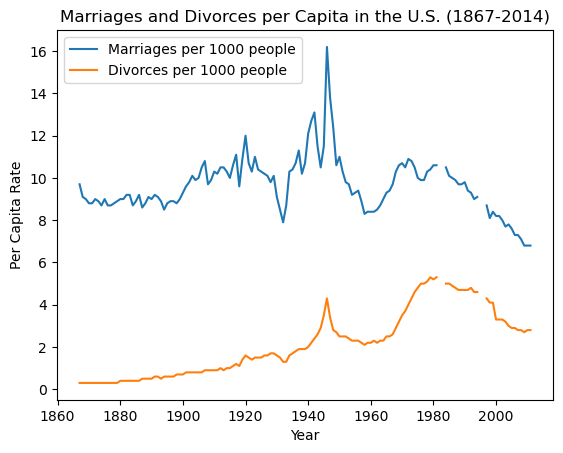

In [89]:

# Plotting marriages per capita
plt.plot(marriage_divorce['Year'], marriage_divorce['Marriages_per_1000'], label='Marriages per 1000 people')

# Plotting divorces per capita
plt.plot(marriage_divorce['Year'], marriage_divorce['Divorces_per_1000'], label='Divorces per 1000 people')

# Adding lthe abels and title
plt.xlabel('Year')
plt.ylabel('Per Capita Rate')
plt.title('Marriages and Divorces per Capita in the U.S. (1867-2014)')

# Adding the legend
plt.legend()

# Display the plot
plt.show()


# Question 7
##### Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.
##### Don't forget to label your axes!

In [ ]:
import matplotlib.pyplot as plt
marriage_divorce = pd.read_csv(r"/Users/sanketnagshetti/Downloads/us-marriages-divorces-1867-2014.csv")

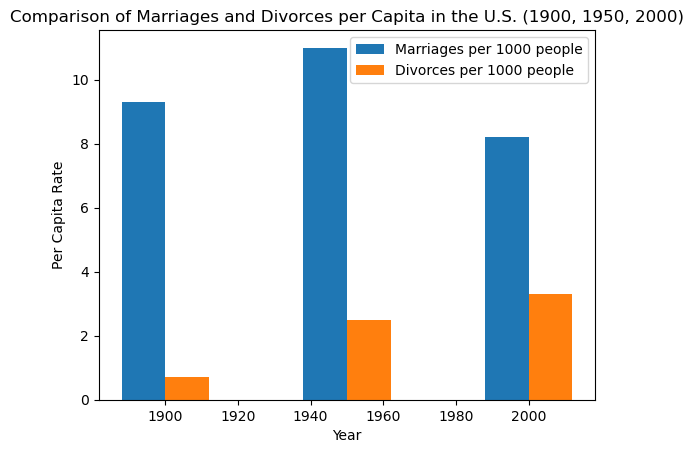

In [95]:
# Filter data for the years 1900, 1950, and 2000
selected_years = marriage_divorce[marriage_divorce['Year'].isin([1900, 1950, 2000])]

# Plotting a bar chart
bar_width = 12
bar_positions_marriages = selected_years['Year'] - bar_width / 2
bar_positions_divorces = selected_years['Year'] + bar_width / 2

plt.bar(bar_positions_marriages, selected_years['Marriages_per_1000'], width=bar_width, label='Marriages per 1000 people')
plt.bar(bar_positions_divorces, selected_years['Divorces_per_1000'], width=bar_width, label='Divorces per 1000 people')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Per Capita Rate')
plt.title('Comparison of Marriages and Divorces per Capita in the U.S. (1900, 1950, 2000)')

# Adding legend
plt.legend()

# Display the plot
plt.show()

# Question 8
##### Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort
##### the actors by their kill count and label each bar with the corresponding actor's name.
##### Don't forget to label your axes!

In [99]:
import matplotlib.pyplot as plt
deadliest_actors = pd.read_csv(r"/Users/sanketnagshetti/Downloads/actor_kill_counts.csv")
deadliest_actors


,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
2,Clint Eastwood,207
3,Clive Owen,194
4,Dolph Lundgren,239
5,Jet Li,201
6,Nicolas Cage,204
7,Sylvester Stallone,267
8,Tomisaburo Wakayama,226
9,Wesley Snipes,193


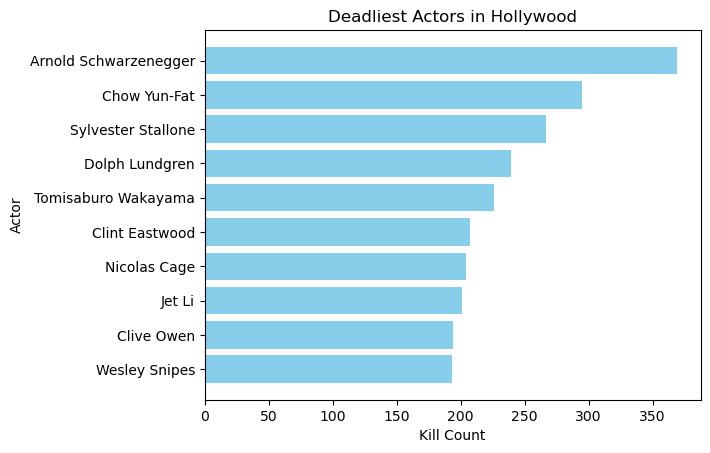

In [102]:
# Sort DataFrame by Kill_Count
deadliest_actors = deadliest_actors.sort_values(by='Count', ascending=True)

# Create a horizontal bar chart
plt.barh(deadliest_actors['Actor'], deadliest_actors['Count'], color='skyblue')
plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood')
plt.show()

# Question 9
##### Create a pie chart showing the fraction of all Roman Emperors that were assassinated.
##### Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown 
##### of the categories.

In [105]:
import matplotlib.pyplot as plt
roman_emperors = pd.read_csv(r"/Users/sanketnagshetti/Downloads/roman-emperor-reigns.csv")
roman_emperors


,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide
...,...,...,...
63,Valentinian I,11.00,Natural causes
64,Valens,14.00,Killed in battle
65,Gratian,16.00,Assassinated
66,Valentinian II,17.00,Possibly assassinated


In [107]:
emperors = roman_emperors.groupby("Cause_of_Death")['Emperor'].count()
emperors

Cause_of_Death
Assassinated             22
Died in captivity         1
Executed                  3
Illness                   5
Killed in battle          8
Natural causes           16
Possibly assassinated     8
Suicide                   5
Name: Emperor, dtype: int64

Text(0.5, 1.0, 'Cause of Death share of Roman Emperor ')

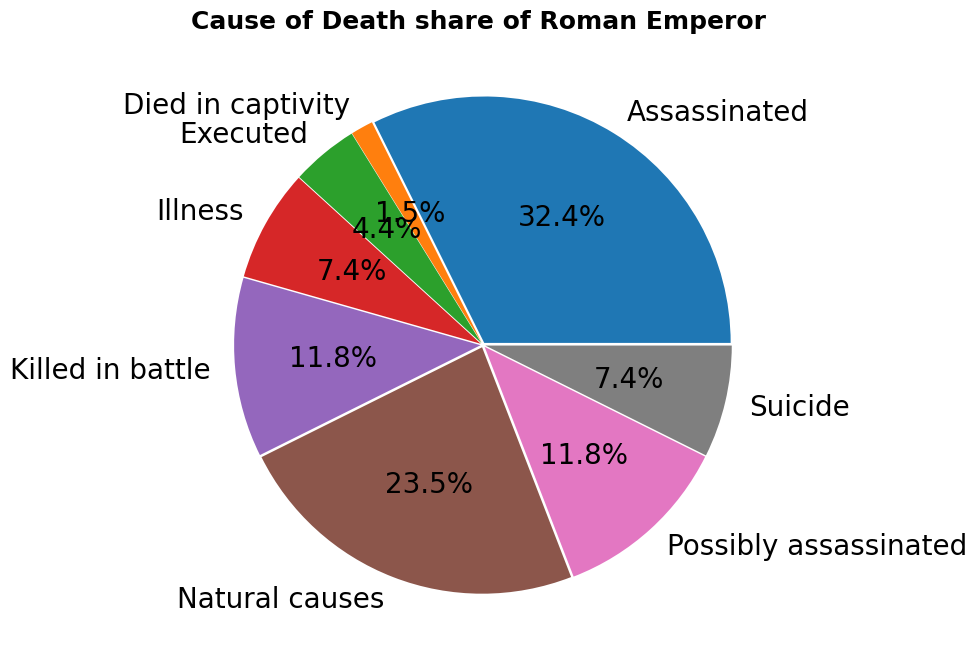

In [109]:
emperors.plot.pie(autopct="%.1f%%", figsize = (8,8), fontsize = 20, ylabel = '', explode = [0.01]*8)
plt.title("Cause of Death share of Roman Emperor ", color = 'Black', fontsize = 18, fontweight = 'bold')

# Question 10
##### Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of 
##### Computer Science PhDs awarded in the U.S. between 2000 and 2009.

In [110]:
import matplotlib.pyplot as plt
student_data = pd.read_csv(r"/Users/sanketnagshetti/Downloads/arcade-revenue-vs-cs-doctorates.csv")
student_data


,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948
5,2005,1.435,1129
6,2006,1.601,1453
7,2007,1.654,1656
8,2008,1.803,1787
9,2009,1.734,1611


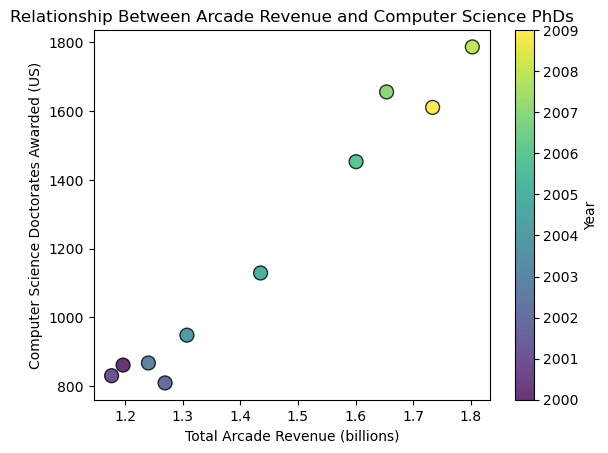

In [112]:
# Assuming student_data is your DataFrame
years = student_data['Year']
revenue = student_data['Total Arcade Revenue (billions)']
doctorates_awarded = student_data['Computer Science Doctorates Awarded (US)']

# Create a scatter plot with color mapping
scatter = plt.scatter(revenue, doctorates_awarded, c=years, cmap='viridis', edgecolors='black', s=100, alpha=0.8)

# Add labels and title
plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('Computer Science Doctorates Awarded (US)')
plt.title('Relationship Between Arcade Revenue and Computer Science PhDs')

# Adding colorbar to indicate years
cbar = plt.colorbar(scatter)
cbar.set_label('Year')

# Showing the plot
plt.show()
